In [1]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
img_filepath = '../data/birds.jpg'

# Read the image (in BGR format)
img = cv2.imread(img_filepath)

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image
ret, thresh = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours (now works because thresh is single-channel binary)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cnt = img.copy()
img_bbox = img.copy()

# Draw contours on the original image (for visualization)
for cnt in contours:
    if cv2.contourArea(cnt) > 200:  # Only draw large enough contours
        cv2.drawContours(img_cnt, [cnt], -1, (0, 255, 0), 2)  # Green contours, thickness=2
        
        x1, y1, w, h  = cv2.boundingRect(cnt)
        cv2.rectangle(img_bbox, (x1, y1), (x1+w, y1+h), (0, 255, 0), 2)
        


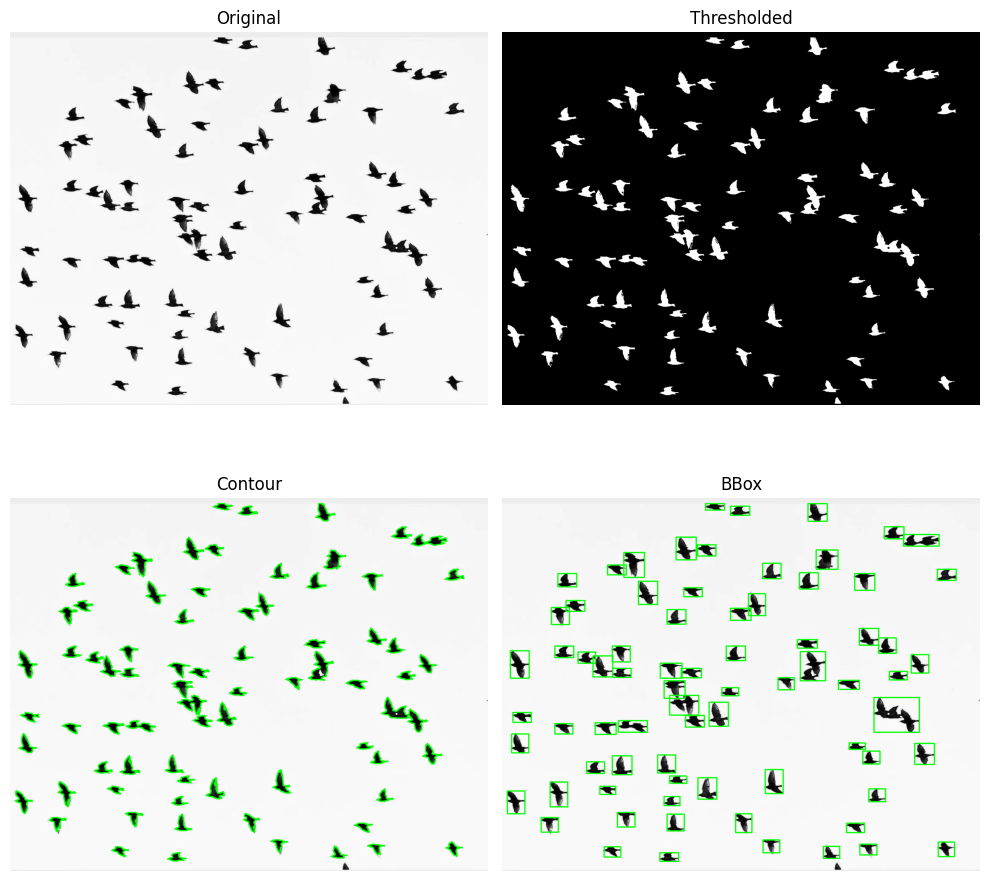

In [3]:
# Display results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))  # 1 row, 2 cols

ax1.imshow(img)
ax1.set_title("Original")
ax1.axis('off')

ax2.imshow(thresh, cmap='gray')
ax2.set_title("Thresholded")
ax2.axis('off')

ax3.imshow(img_cnt)
ax3.set_title("Contour")
ax3.axis('off')

ax4.imshow(img_bbox)
ax4.set_title("BBox")
ax4.axis('off')

plt.tight_layout()
plt.show()